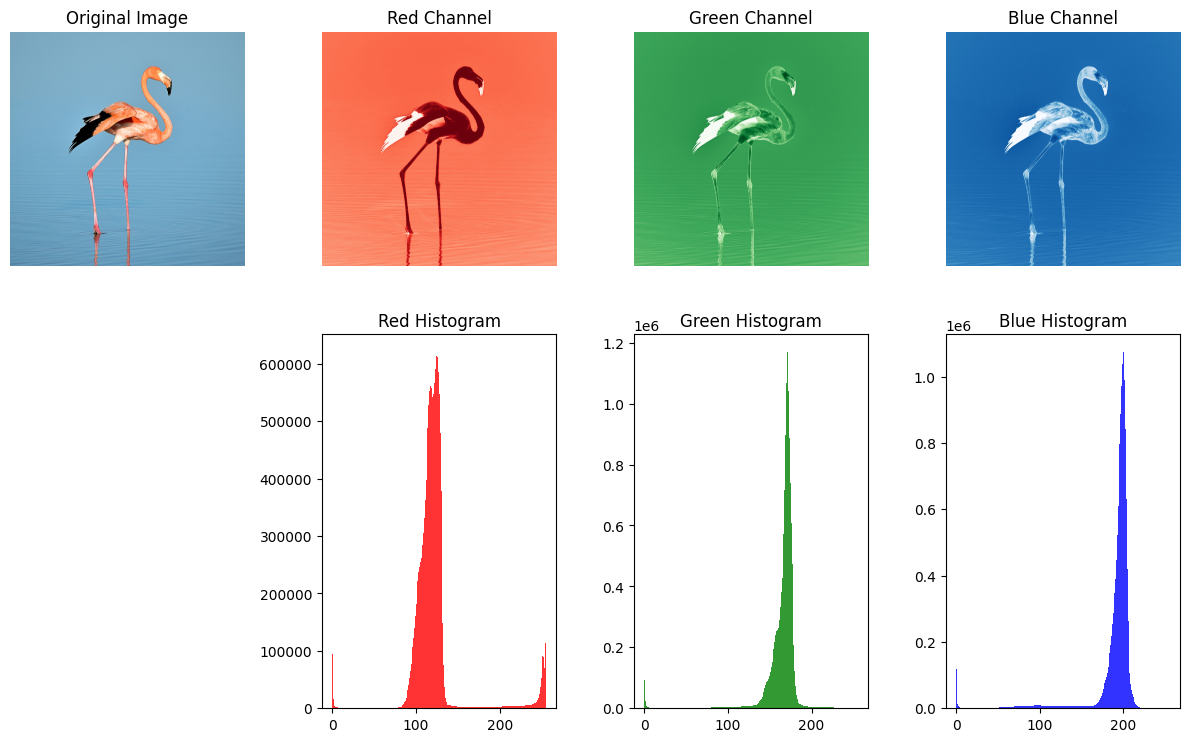

In [1]:
# Original Question: 
# 1. Show RGB colour components of an image separately as well as plot their corresponding histograms.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'input_image.jpg' with your image file path)
# cv2.imread loads images in BGR format, so we'll convert it to RGB.
image = cv2.imread('./images/image1.jpg')  # Load the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Separate the RGB components from the image
# R represents the Red channel (the first layer in RGB images)
R = image[:, :, 0]  # Extract the Red channel
# G represents the Green channel (the second layer in RGB images)
G = image[:, :, 1]  # Extract the Green channel
# B represents the Blue channel (the third layer in RGB images)
B = image[:, :, 2]  # Extract the Blue channel

# Plot the original image and the separated RGB components
plt.figure(figsize=(12, 8))

# Display the original image
plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

# Display the Red channel
plt.subplot(2, 4, 2)
plt.imshow(R, cmap='Reds')  # Display in grayscale
plt.title("Red Channel")
plt.axis('off')

# Plot the histogram of the Red channel
plt.subplot(2, 4, 6)
plt.hist(R.ravel(), bins=256, color='red', alpha=0.8)
plt.title("Red Histogram")

# Display the Green channel
plt.subplot(2, 4, 3)
plt.imshow(G, cmap='Greens')  # Display in grayscale
plt.title("Green Channel")
plt.axis('off')

# Plot the histogram of the Green channel
plt.subplot(2, 4, 7)
plt.hist(G.ravel(), bins=256, color='green', alpha=0.8)
plt.title("Green Histogram")

# Display the Blue channel
plt.subplot(2, 4, 4)
plt.imshow(B, cmap='Blues')  # Display in grayscale
plt.title("Blue Channel")
plt.axis('off')

# Plot the histogram of the Blue channel
plt.subplot(2, 4, 8)
plt.hist(B.ravel(), bins=256, color='blue', alpha=0.8)
plt.title("Blue Histogram")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Min intensity: 0 Max intensity: 171


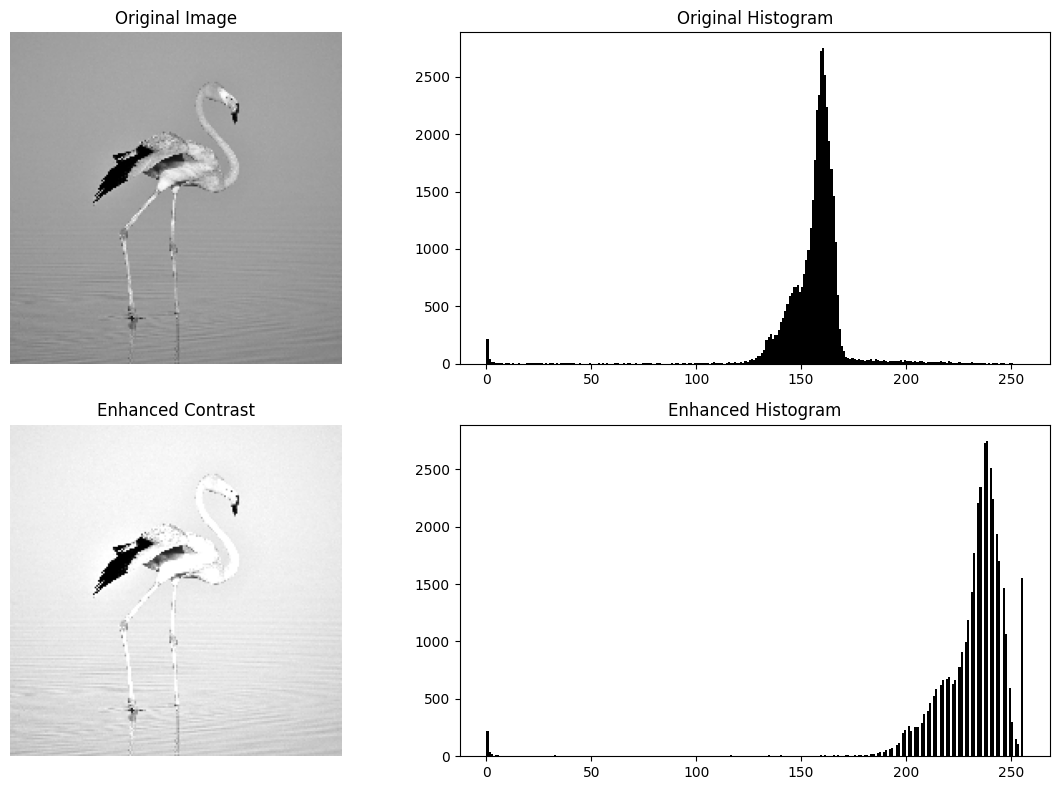

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale and resize it
height, width = 200, 200
hist_threshold = 100

# Replace with your image path
image_path = './images/image1.jpg'  # Update to your file location
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (width, height))

# Plot the original histogram
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Original Histogram")

# Perform histogram analysis to find min and max based on threshold
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
min_r, max_r = 0, 255

for i in range(256):
    if hist[i] < hist_threshold:
        min_r = i
    else:
        break

for i in range(255, -1, -1):
    if hist[i] < hist_threshold:
        max_r = i
    else:
        break

print("Min intensity:", min_r, "Max intensity:", max_r)

# Perform contrast stretching
stretched = np.clip((img - min_r) * (255 / (max_r - min_r)), 0, 255).astype(np.uint8)

# Plot the enhanced image and histogram
plt.subplot(2, 2, 3)
plt.imshow(stretched, cmap='gray')
plt.title("Enhanced Contrast")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.hist(stretched.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Enhanced Histogram")

plt.tight_layout()
plt.show()


In [3]:
# Original Question:
# 3. Perform Histogram Equalization for the purpose of image enhancement. 
# Display the original image, the enhanced image, and their corresponding histograms respectively.
# (Refrain from using built-in functions like "equalizeHist" in OpenCV).

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'input_image.jpg' with your file path)
image = cv2.imread('input_image.jpg', cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Function to perform histogram equalization
def histogram_equalization(img):
    # Compute histogram and cumulative distribution function (CDF)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    cdf = hist.cumsum()  # Cumulative sum
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to [0, 255]
    
    # Use the CDF as a lookup table to map pixel values
    equalized_img = cdf_normalized[img]
    return equalized_img.astype(np.uint8)

# Perform histogram equalization
enhanced_image = histogram_equalization(image)

# Plot the original and equalized images along with their histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Original histogram
plt.subplot(2, 4, 5)
plt.hist(image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Original Histogram")

# Enhanced image
plt.subplot(2, 4, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced Image")
plt.axis('off')

# Enhanced histogram
plt.subplot(2, 4, 6)
plt.hist(enhanced_image.ravel(), bins=256, color='black', alpha=0.8)
plt.title("Enhanced Histogram")

plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'flatten'

In [ ]:
# Original Question:
# 4. Utilize image arithmetic operators to perform the task of adding objects to an external scenery. 
# Display all the images that you have used using subplots including the eventual outcome.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images (replace with your file paths)
background = cv2.imread('scenery.jpg')  # The external scenery
object_img = cv2.imread('object.png')  # The object to add

# Convert BGR to RGB for Matplotlib display
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
object_img = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)

# Resize the object to fit into the background
object_resized = cv2.resize(object_img, (150, 150))  # Resize object (adjust as needed)

# Define a region of interest (ROI) in the background where the object will be added
x_offset, y_offset = 100, 50  # Position where the object will be added
x_end = x_offset + object_resized.shape[1]
y_end = y_offset + object_resized.shape[0]

# Blend the object into the background
# Create a mask for the object (non-black regions)
object_gray = cv2.cvtColor(object_resized, cv2.COLOR_RGB2GRAY)
_, mask = cv2.threshold(object_gray, 1, 255, cv2.THRESH_BINARY)  # Binary mask
mask_inv = cv2.bitwise_not(mask)  # Inverse mask

# Black-out the area of the object in ROI
background_roi = background[y_offset:y_end, x_offset:x_end]
background_roi_no_object = cv2.bitwise_and(background_roi, background_roi, mask=mask_inv)

# Extract only the object region
object_only = cv2.bitwise_and(object_resized, object_resized, mask=mask)

# Add the object to the ROI
result_roi = cv2.add(background_roi_no_object, object_only)
background[y_offset:y_end, x_offset:x_end] = result_roi

# Plot the images
plt.figure(figsize=(12, 8))

# Display the background image
plt.subplot(2, 3, 1)
plt.imshow(background)
plt.title("Original Scenery")
plt.axis('off')

# Display the object image
plt.subplot(2, 3, 2)
plt.imshow(object_img)
plt.title("Object Image")
plt.axis('off')

# Display the resized object
plt.subplot(2, 3, 3)
plt.imshow(object_resized)
plt.title("Resized Object")
plt.axis('off')

# Display the final image with the object added
plt.subplot(2, 3, 4)
plt.imshow(background)
plt.title("Final Scenery with Object")
plt.axis('off')

plt.tight_layout()
plt.show()


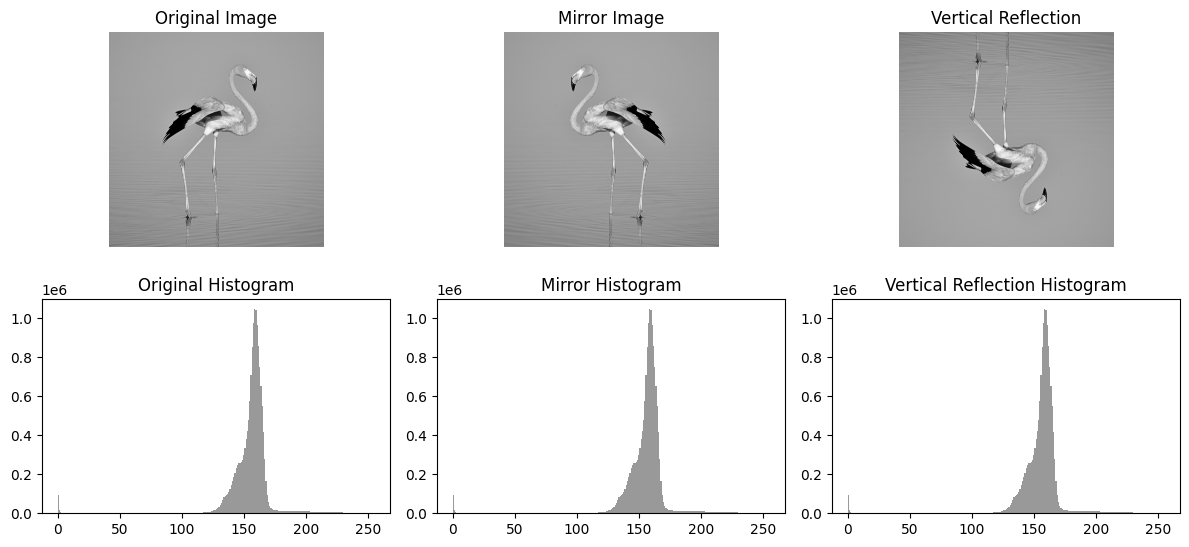

In [1]:
# Original Question:
# 6. Take one input image and create a mirror image of it as well as create one vertical reflection of the same input image. 
# With the utilization of histogram, show whether any changes occur in terms of pixels or not. Display all the images and plots using subplot.

# '.images/image1.jpg'
# images\image1.jpg

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image (replace with your file path)
image = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded properly
if image is None:
    print("Error: Image not found!")
    exit()

# Create a mirror image (flip horizontally)
mirror_image = cv2.flip(image, 1)

# Create a vertical reflection (flip vertically)
vertical_reflection = cv2.flip(image, 0)

# Plot the images and histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')  # Ensure the image is displayed in grayscale
plt.title("Original Image")
plt.axis('off')

# Original image histogram
plt.subplot(3, 3, 4)
plt.hist(image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Original Histogram")

# Mirror image
plt.subplot(3, 3, 2)
plt.imshow(mirror_image, cmap='gray')  # Ensure the mirror image is displayed in grayscale
plt.title("Mirror Image")
plt.axis('off')

# Mirror image histogram
plt.subplot(3, 3, 5)
plt.hist(mirror_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Mirror Histogram")

# Vertical reflection
plt.subplot(3, 3, 3)
plt.imshow(vertical_reflection, cmap='gray')  # Ensure the vertical reflection is displayed in grayscale
plt.title("Vertical Reflection")
plt.axis('off')

# Vertical reflection histogram
plt.subplot(3, 3, 6)
plt.hist(vertical_reflection.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Vertical Reflection Histogram")

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the images and histograms
plt.show()

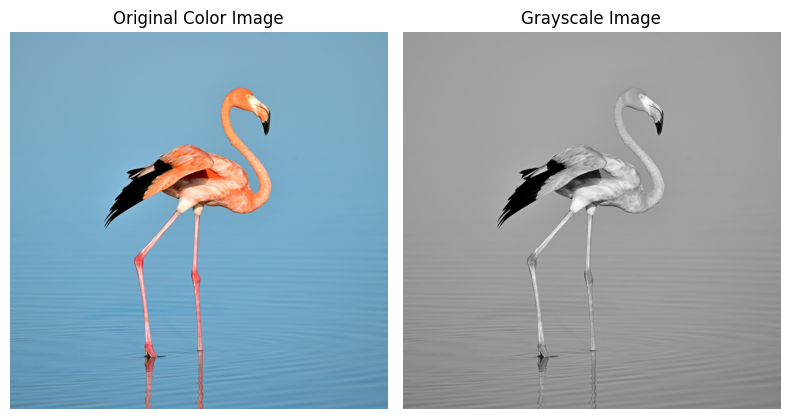

In [3]:
# Original Question:
# 7. Consider a colour image as input and convert the same to a gray-scale image subsequently. 
# Display all the images including the converted ones using subplot.

import cv2
import matplotlib.pyplot as plt

# Load the color image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Plot the images
plt.figure(figsize=(8, 6))

# Original color image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Color Image")
plt.axis('off')

# Grayscale image
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.tight_layout()
plt.show()


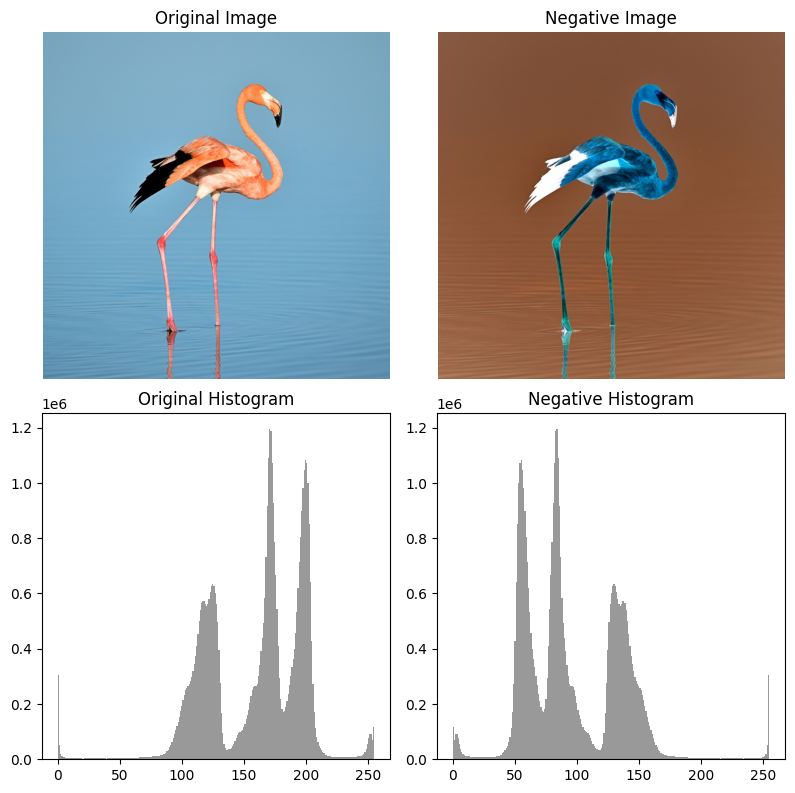

In [4]:
# Original Question:
# 8. Convert a given colour image to its corresponding negative image. 
# Display the images along with their corresponding histograms. (Do not convert the colour image to gray-scale or black and white image).

import cv2
import matplotlib.pyplot as plt

# Load the color image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

# Create the negative image
negative_image = 255 - image_rgb

# Plot the images and histograms
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image_rgb.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Original Histogram")

# Negative image
plt.subplot(2, 3, 2)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(negative_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Negative Histogram")

plt.tight_layout()
plt.show()


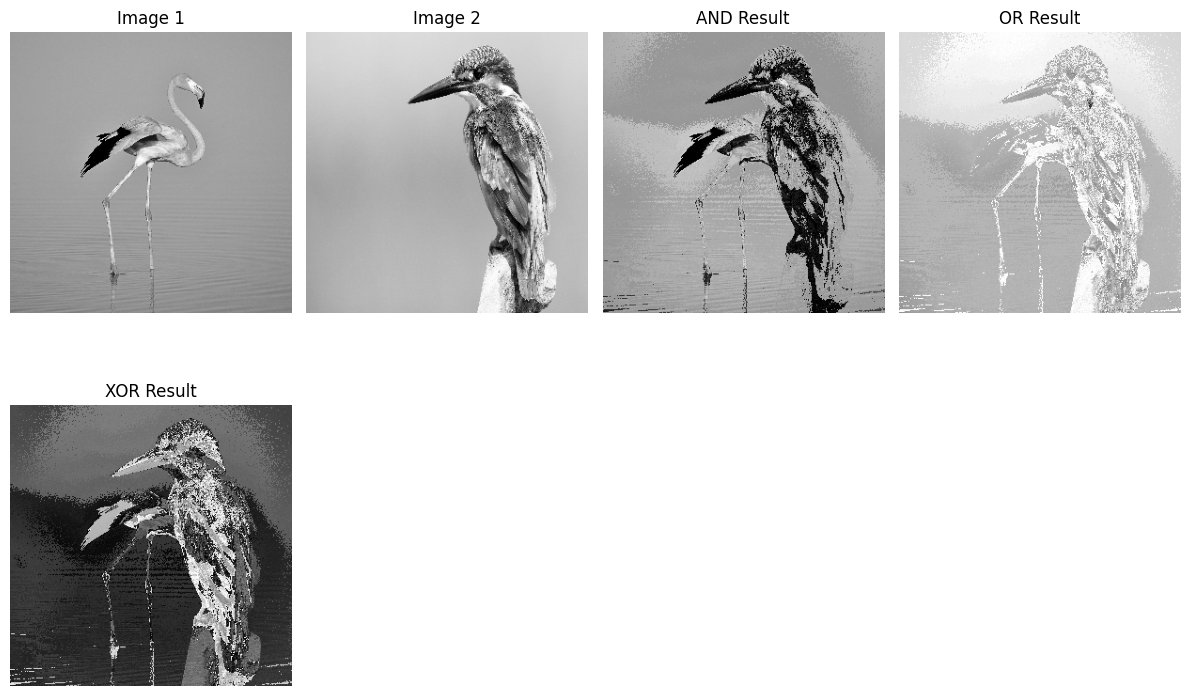

In [5]:
# Original Question:
# 9. Perform AND, OR, and XOR operations on two different input images. 
# Display the corresponding results along with the input images.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images (replace with your file paths)
image1 = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the images to the same dimensions if needed
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Perform bitwise operations
and_result = cv2.bitwise_and(image1, image2)
or_result = cv2.bitwise_or(image1, image2)
xor_result = cv2.bitwise_xor(image1, image2)

# Plot the images
plt.figure(figsize=(12, 8))

# Image 1
plt.subplot(2, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

# Image 2
plt.subplot(2, 4, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

# AND result
plt.subplot(2, 4, 3)
plt.imshow(and_result, cmap='gray')
plt.title("AND Result")
plt.axis('off')

# OR result
plt.subplot(2, 4, 4)
plt.imshow(or_result, cmap='gray')
plt.title("OR Result")
plt.axis('off')

# XOR result
plt.subplot(2, 4, 5)
plt.imshow(xor_result, cmap='gray')
plt.title("XOR Result")
plt.axis('off')

plt.tight_layout()
plt.show()


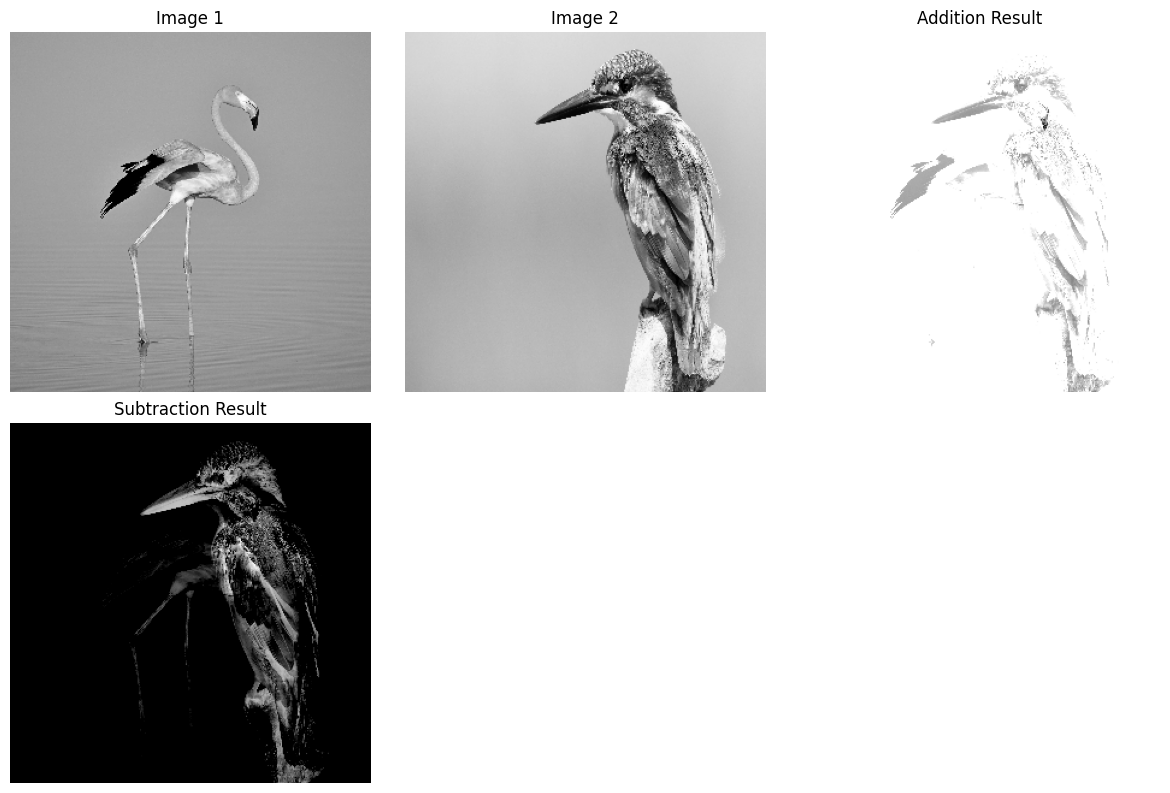

In [6]:
# Original Question:
# 10. Perform addition of given two input images. Also, perform subtraction of the same two. 
# Display all the images as well as generated outcomes after the operations.

import cv2
import matplotlib.pyplot as plt

# Load the two images (replace with your file paths)
image1 = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the images to the same dimensions if needed
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Perform addition and subtraction
add_result = cv2.add(image1, image2)  # Adds pixel values
subtract_result = cv2.subtract(image1, image2)  # Subtracts pixel values

# Plot the images
plt.figure(figsize=(12, 8))

# Image 1
plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Image 1")
plt.axis('off')

# Image 2
plt.subplot(2, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Image 2")
plt.axis('off')

# Addition result
plt.subplot(2, 3, 3)
plt.imshow(add_result, cmap='gray')
plt.title("Addition Result")
plt.axis('off')

# Subtraction result
plt.subplot(2, 3, 4)
plt.imshow(subtract_result, cmap='gray')
plt.title("Subtraction Result")
plt.axis('off')

plt.tight_layout()
plt.show()


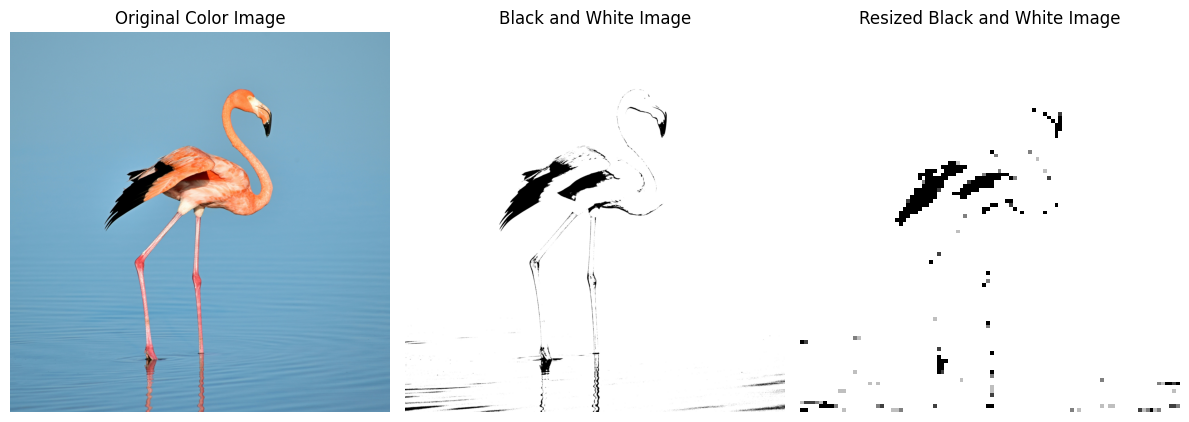

In [8]:
# Original Question:
# 11. Take one colour image as input. Resize the image after converting it to a black-and-white image.
# Display the inputted image, the converted black and white image, as well as the resized image.

import cv2
import matplotlib.pyplot as plt

# Load the color image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

# Convert to black and white
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
threshold_value, bw_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Resize the black and white image
resized_bw = cv2.resize(bw_image, (100, 100))  # Resize dimensions

# Plot the images
plt.figure(figsize=(12, 8))

# Original color image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Color Image")
plt.axis('off')

# Black and white image
plt.subplot(1, 3, 2)
plt.imshow(bw_image, cmap='gray')
plt.title("Black and White Image")
plt.axis('off')

# Resized black and white image
plt.subplot(1, 3, 3)
plt.imshow(resized_bw, cmap='gray')
plt.title("Resized Black and White Image")
plt.axis('off')

plt.tight_layout()
plt.show()


In [28]:
# Original Question:
# 12. Create a watermark of your name on an input image using the image mathematical operators.
# Display the non-watermarked image and the watermarked outcome.


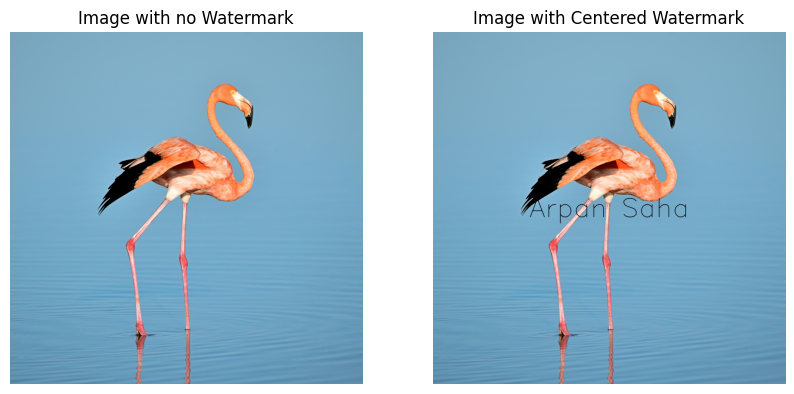

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = 'images/image1.jpg'  # Ensure this is the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Image not found at path: {image_path}")
else:
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib expects)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_rgb_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define watermark text properties
    watermark_text = 'Arpan Saha'  # Text to be written on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 10         # Make the text larger
    font_color = (0, 0, 0)  # Black color for watermark text
    thickness = 5
    line_type = cv2.LINE_AA

    # Get the size of the text for positioning (width, height)
    (text_width, text_height), _ = cv2.getTextSize(watermark_text, font, font_scale, thickness)

    # Calculate the center of the image
    text_x = (image_rgb.shape[1] - text_width) // 2  # Horizontally center the text
    text_y = (image_rgb.shape[0] + text_height) // 2  # Vertically center the text

    # Add the text to the image
    cv2.putText(image_rgb, watermark_text, (text_x, text_y), font, font_scale, font_color, thickness, line_type)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.subplot(1,2,1)
    plt.imshow(image_rgb_copy)
    plt.title("Image with no Watermark")
    plt.axis('off')  # Hide axis for better viewing

    plt.subplot(1,2,2)
    plt.imshow(image_rgb)
    plt.title("Image with Centered Watermark")
    plt.axis('off')  # Hide axis for better viewing
    
    plt.show()


In [41]:
# Original Question:
# 13. Create a watermark of your name on a negative of an input image using the image mathematical operators. 
# Display the non-watermarked image and the watermarked negative outcome along with their corresponding histograms.

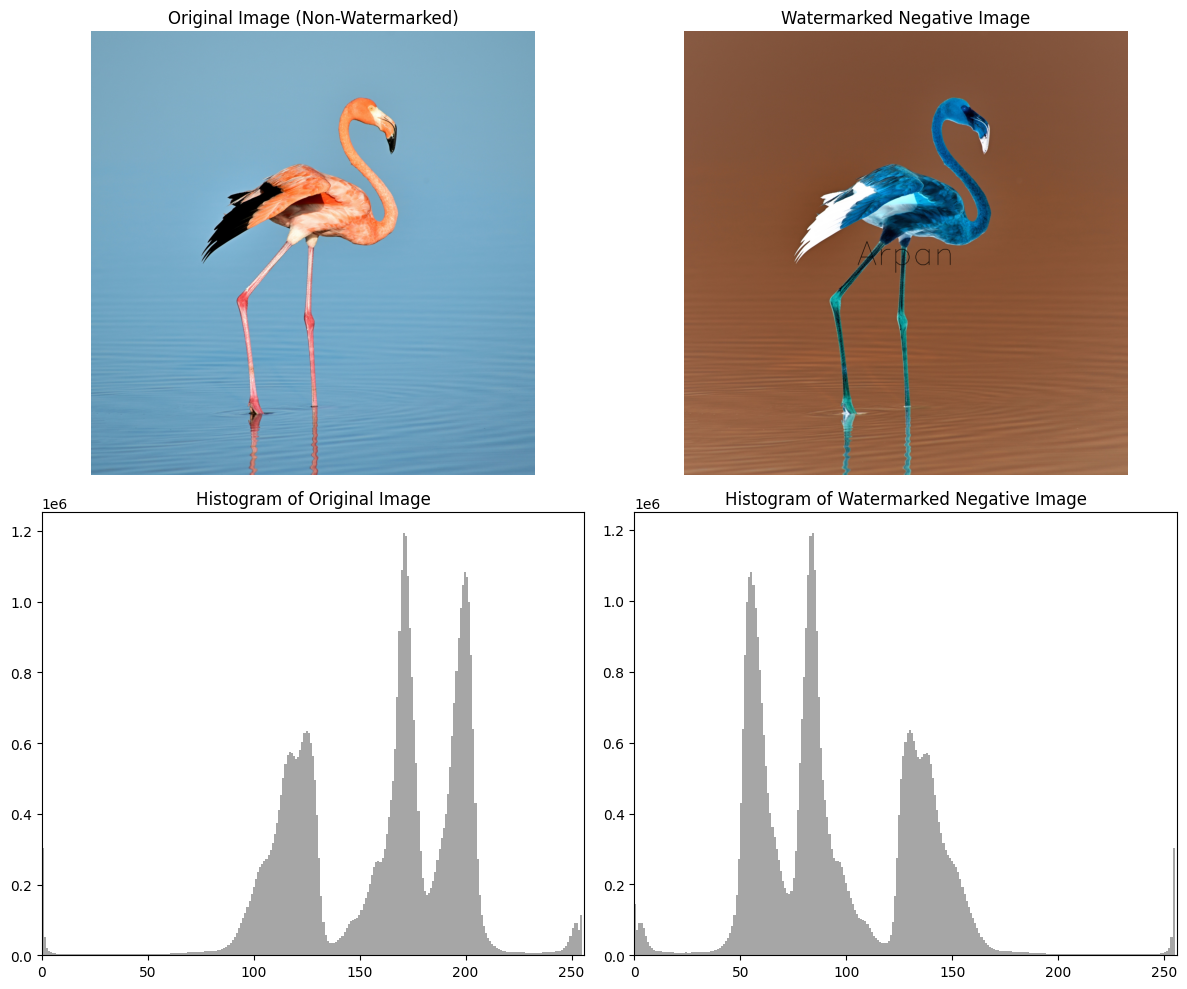

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
image_path = 'images/image1.jpg'  # Ensure this is the correct path to your image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print(f"Error: Image not found at path: {image_path}")
else:
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib expects)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 1: Create the Negative of the image
    negative_image_rgb = 255 - image_rgb  # Invert the pixel values to create the negative

    # Step 2: Define watermark text properties for the watermark
    watermark_text = 'Arpan'  # Text to be written as watermark
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 10
    font_color = (0, 0, 0)  # Black color for watermark text
    thickness = 3
    line_type = cv2.LINE_AA

    # Get the size of the text for positioning (width, height)
    (text_width, text_height), _ = cv2.getTextSize(watermark_text, font, font_scale, thickness)

    # Calculate the center of the negative image for watermarking
    text_x = (negative_image_rgb.shape[1] - text_width) // 2
    text_y = (negative_image_rgb.shape[0] + text_height) // 2

    # Step 3: Add the watermark text on the negative image
    negative_overlay = negative_image_rgb.copy()
    cv2.putText(negative_overlay, watermark_text, (text_x, text_y), font, font_scale, font_color, thickness, line_type)

    # Step 4: Create the plot with 2 rows and 2 columns using subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Plot original image (non-watermarked)
    axs[0, 0].imshow(image_rgb)
    axs[0, 0].set_title("Original Image (Non-Watermarked)")
    axs[0, 0].axis('off')  # Hide axis for a cleaner look

    # Plot watermarked negative image
    axs[0, 1].imshow(negative_overlay)
    axs[0, 1].set_title("Watermarked Negative Image")
    axs[0, 1].axis('off')  # Hide axis for a cleaner look

    # Plot histogram for the original image (non-watermarked)
    axs[1, 0].hist(image_rgb.ravel(), bins=256, color='gray', alpha=0.7)
    axs[1, 0].set_title("Histogram of Original Image")
    axs[1, 0].set_xlim([0, 256])

    # Plot histogram for the watermarked negative image
    axs[1, 1].hist(negative_overlay.ravel(), bins=256, color='gray', alpha=0.7)
    axs[1, 1].set_title("Histogram of Watermarked Negative Image")
    axs[1, 1].set_xlim([0, 256])

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Show the combined plot with images and histograms
    plt.show()


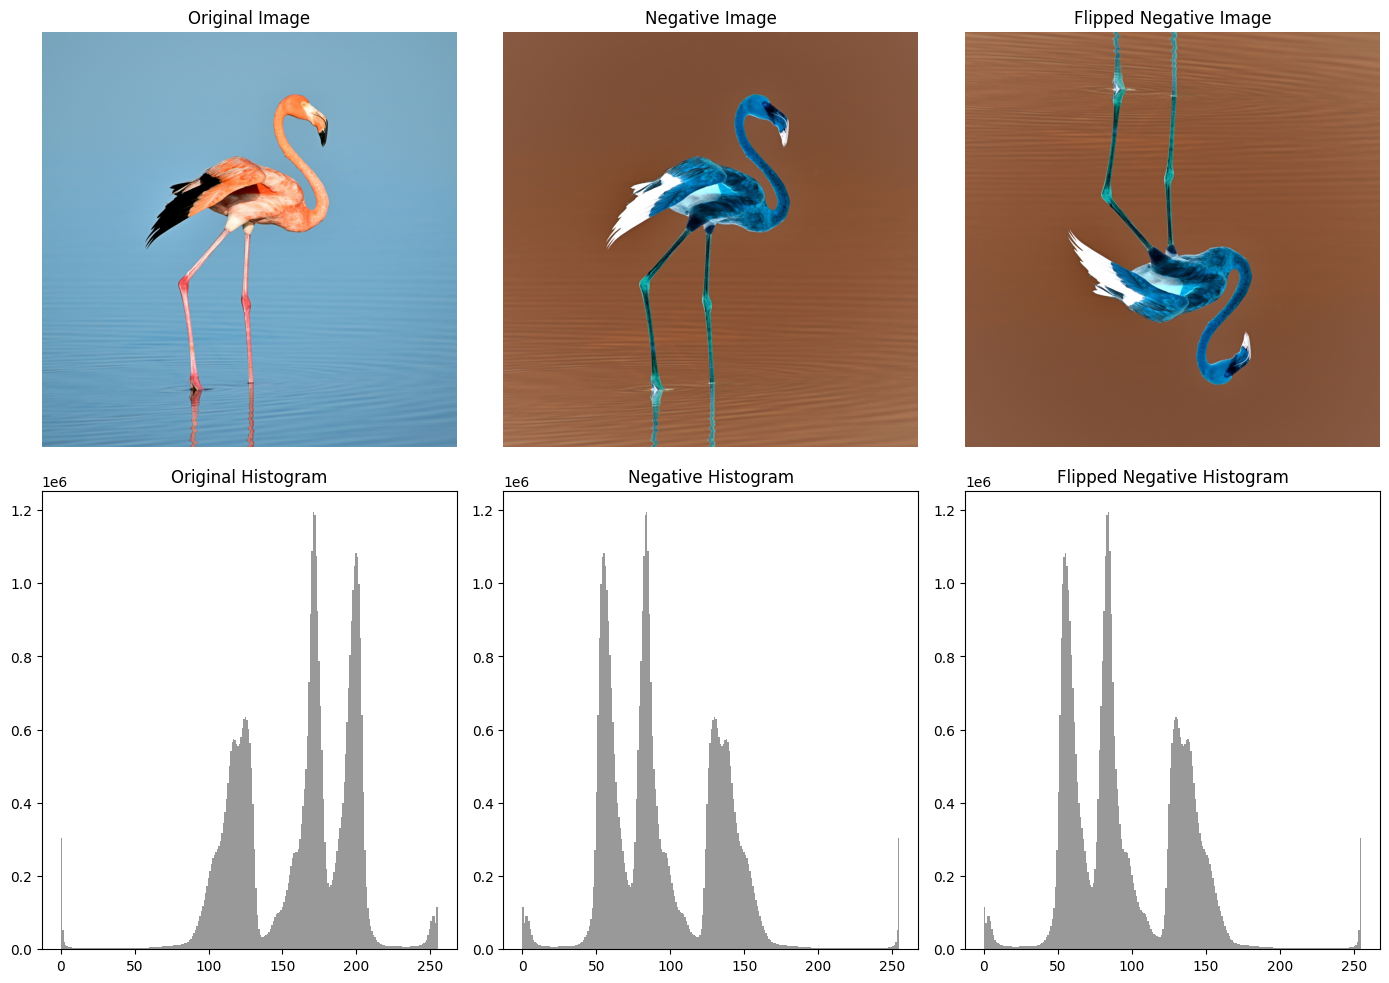

In [47]:
# Original Question:
# 14. Take one input image and flip the negative of the image upside down. 
# Display all the images including the resultant image along with the corresponding histograms.

import cv2
import matplotlib.pyplot as plt

# Load the image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create the negative of the image
negative_image = 255 - image_rgb

# Flip the negative image upside down
flipped_negative = cv2.flip(negative_image, 0)

# Plot the images and histograms
plt.figure(figsize=(14, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image_rgb.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Original Histogram")

# Negative image
plt.subplot(2, 3, 2)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(negative_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Negative Histogram")

# Flipped negative image
plt.subplot(2, 3, 3)
plt.imshow(flipped_negative)
plt.title("Flipped Negative Image")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.hist(flipped_negative.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Flipped Negative Histogram")

plt.tight_layout()
plt.show()


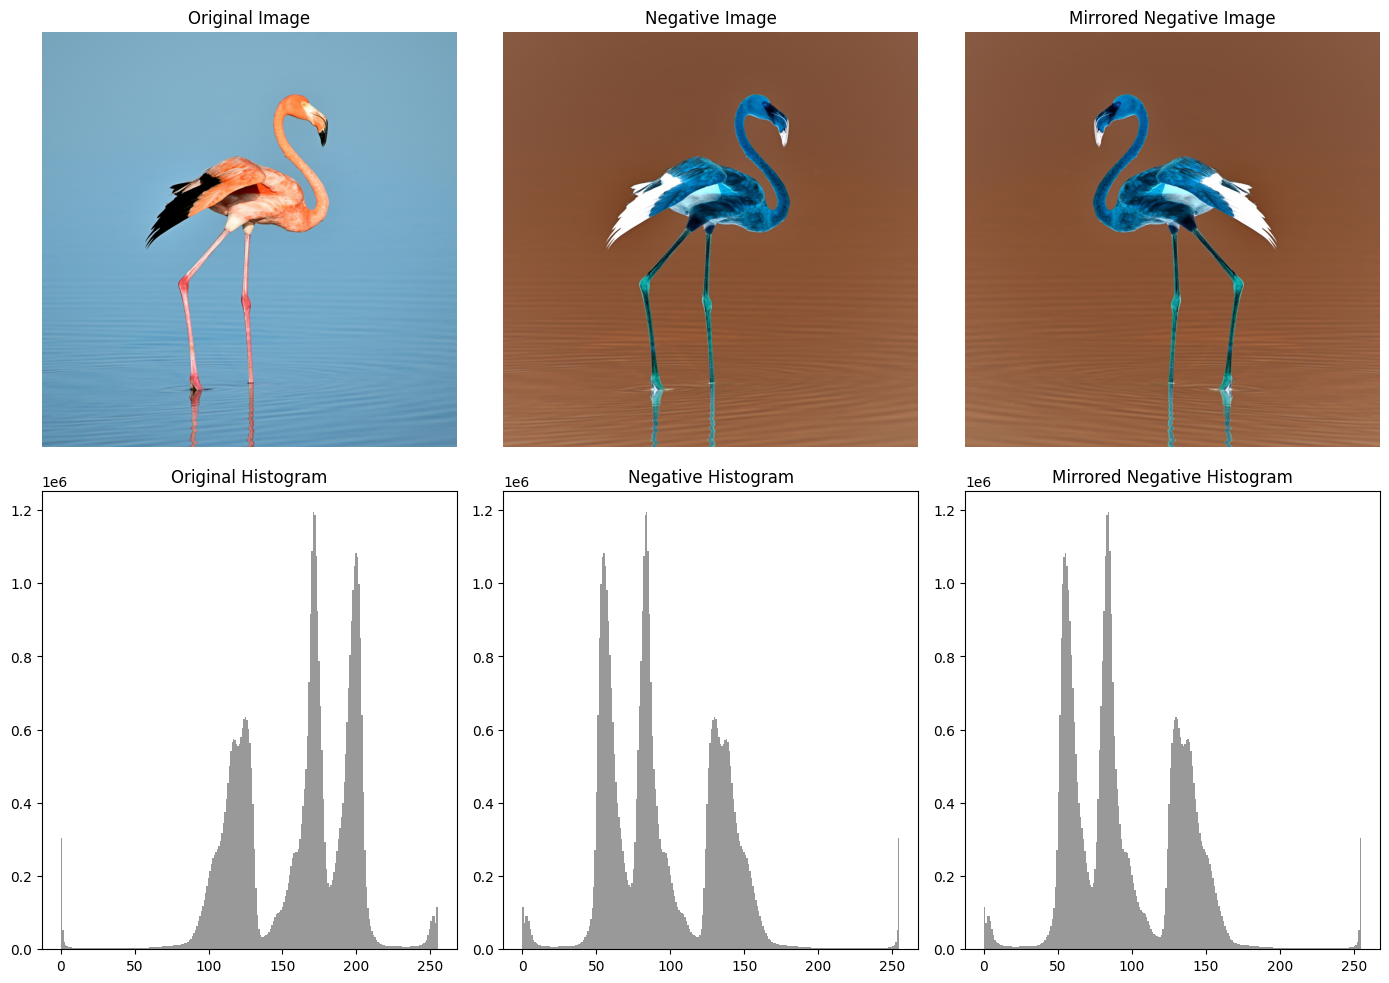

In [48]:
# Original Question:
# 15. Take one input image and flip the negative of the image, in other words, mirror image of the negative. 
# Display all the images including the resultant image along with the corresponding histograms.

import cv2
import matplotlib.pyplot as plt

# Load the image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create the negative of the image
negative_image = 255 - image_rgb

# Mirror the negative image
mirrored_negative = cv2.flip(negative_image, 1)

# Plot the images and histograms
plt.figure(figsize=(14, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image_rgb.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Original Histogram")

# Negative image
plt.subplot(2, 3, 2)
plt.imshow(negative_image)
plt.title("Negative Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(negative_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Negative Histogram")

# Mirrored negative image
plt.subplot(2, 3, 3)
plt.imshow(mirrored_negative)
plt.title("Mirrored Negative Image")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.hist(mirrored_negative.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Mirrored Negative Histogram")

plt.tight_layout()
plt.show()


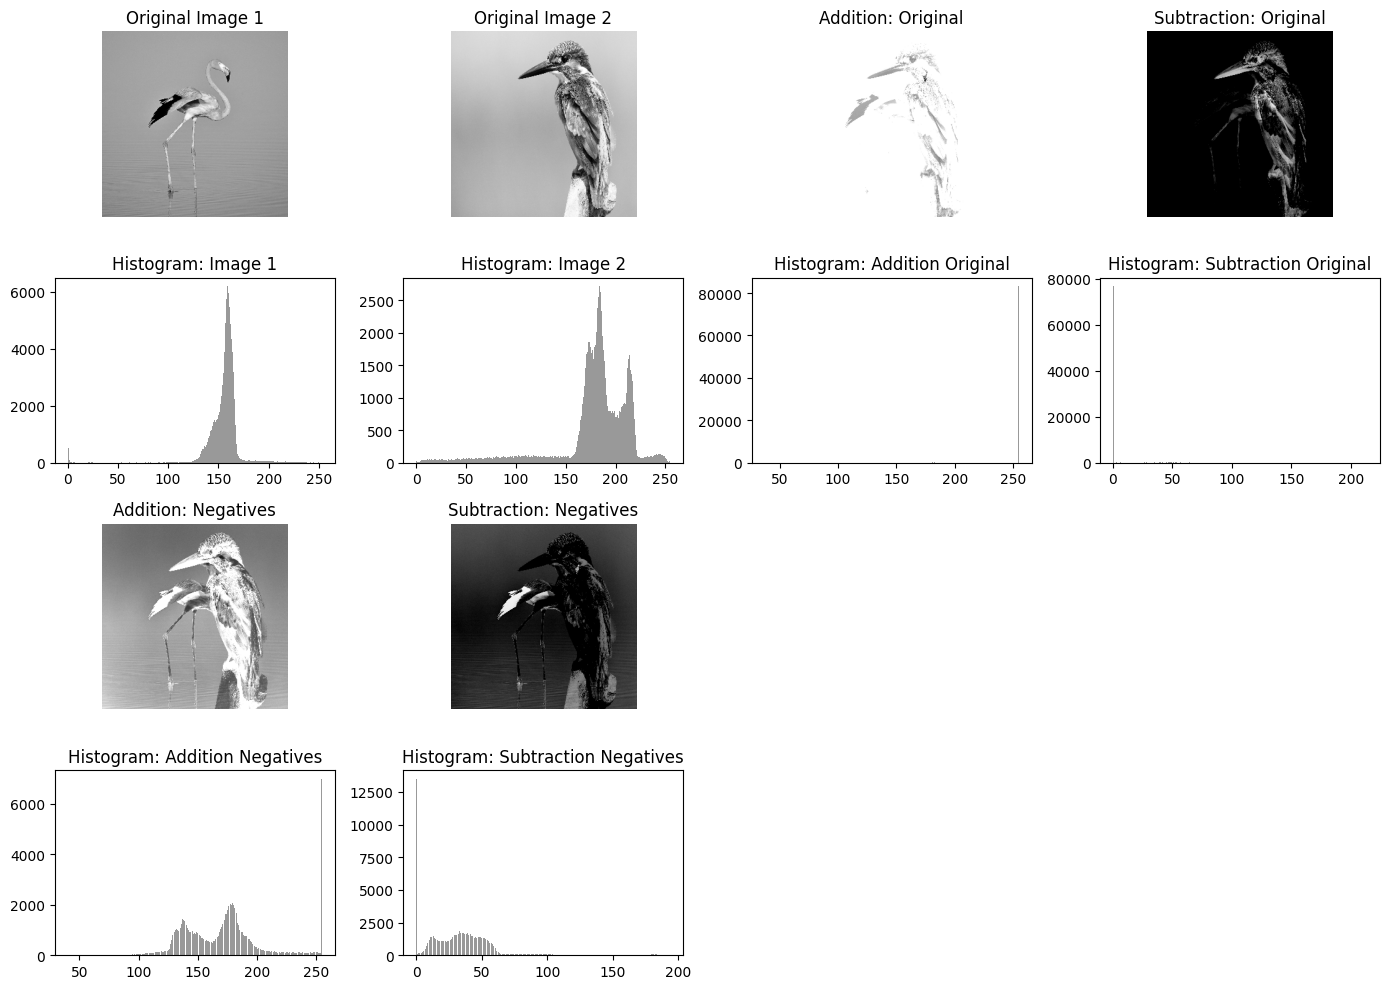

In [49]:
# Original Question:
# 16. Perform addition of two input images and also perform the same on their corresponding negative images. 
# Display original inputted images, the outcomes in both cases, and all their corresponding histograms.

import cv2
import matplotlib.pyplot as plt

# Load the two images (replace with your file paths)
image1 = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize images to the same dimensions if needed
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Create the negatives of the images
negative1 = 255 - image1
negative2 = 255 - image2

# Perform addition and subtraction on the original images
add_original = cv2.add(image1, image2)
sub_original = cv2.subtract(image1, image2)

# Perform addition and subtraction on the negative images
add_negative = cv2.add(negative1, negative2)
sub_negative = cv2.subtract(negative1, negative2)

# Plot images and histograms
plt.figure(figsize=(14, 10))

# Original Image 1
plt.subplot(4, 4, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(4, 4, 5)
plt.hist(image1.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Image 1")

# Original Image 2
plt.subplot(4, 4, 2)
plt.imshow(image2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

plt.subplot(4, 4, 6)
plt.hist(image2.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Image 2")

# Addition of Original Images
plt.subplot(4, 4, 3)
plt.imshow(add_original, cmap='gray')
plt.title("Addition: Original")
plt.axis('off')

plt.subplot(4, 4, 7)
plt.hist(add_original.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Addition Original")

# Subtraction of Original Images
plt.subplot(4, 4, 4)
plt.imshow(sub_original, cmap='gray')
plt.title("Subtraction: Original")
plt.axis('off')

plt.subplot(4, 4, 8)
plt.hist(sub_original.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Subtraction Original")

# Addition of Negatives
plt.subplot(4, 4, 9)
plt.imshow(add_negative, cmap='gray')
plt.title("Addition: Negatives")
plt.axis('off')

plt.subplot(4, 4, 13)
plt.hist(add_negative.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Addition Negatives")

# Subtraction of Negatives
plt.subplot(4, 4, 10)
plt.imshow(sub_negative, cmap='gray')
plt.title("Subtraction: Negatives")
plt.axis('off')

plt.subplot(4, 4, 14)
plt.hist(sub_negative.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Subtraction Negatives")

plt.tight_layout()
plt.show()


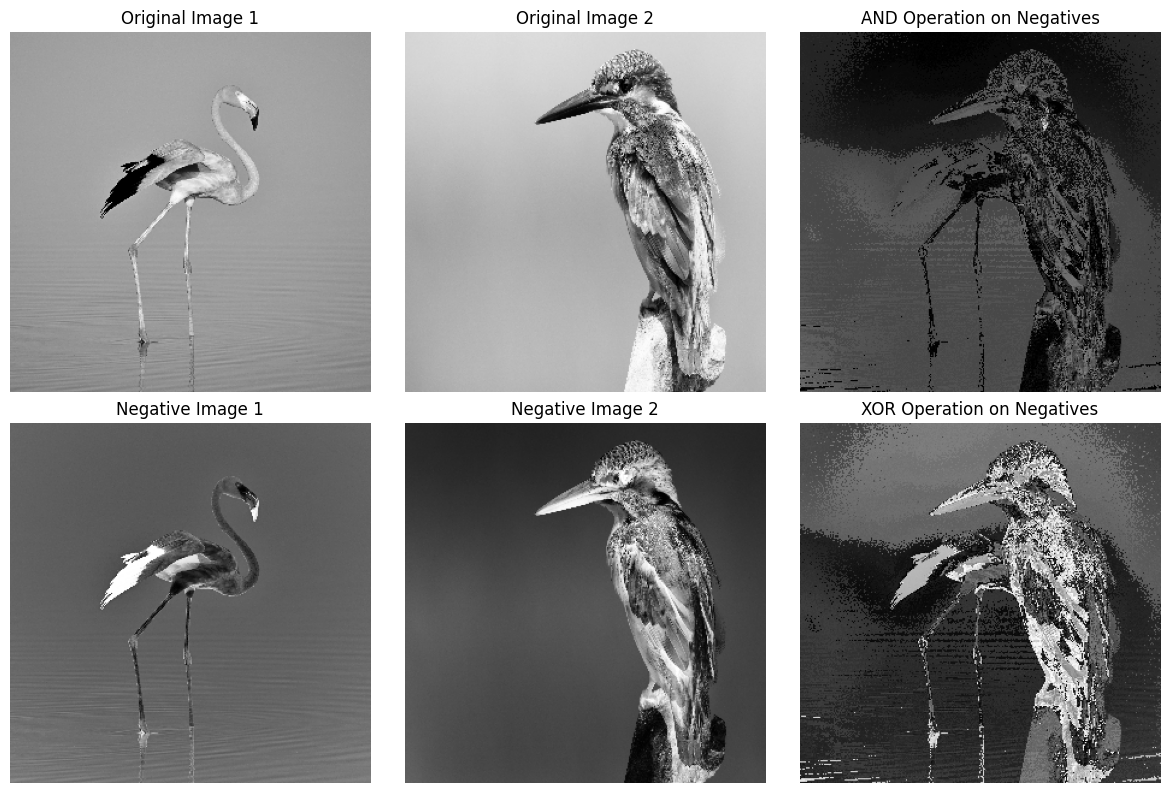

In [50]:
# Original Question:
# 17. Perform AND and XOR operations on the negative of two different input images. 
# Display the corresponding results along with the input images.

import cv2
import matplotlib.pyplot as plt

# Load the two images (replace with your file paths)
image1 = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('images/image2.jpg', cv2.IMREAD_GRAYSCALE)

# Resize images to the same dimensions if needed
image1 = cv2.resize(image1, (300, 300))
image2 = cv2.resize(image2, (300, 300))

# Create the negatives of the images
negative1 = 255 - image1
negative2 = 255 - image2

# Perform AND and XOR operations
and_result = cv2.bitwise_and(negative1, negative2)
xor_result = cv2.bitwise_xor(negative1, negative2)

# Plot the images
plt.figure(figsize=(12, 8))

# Original Image 1
plt.subplot(2, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

# Original Image 2
plt.subplot(2, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

# AND Operation Result
plt.subplot(2, 3, 3)
plt.imshow(and_result, cmap='gray')
plt.title("AND Operation on Negatives")
plt.axis('off')

# Negative Image 1
plt.subplot(2, 3, 4)
plt.imshow(negative1, cmap='gray')
plt.title("Negative Image 1")
plt.axis('off')

# Negative Image 2
plt.subplot(2, 3, 5)
plt.imshow(negative2, cmap='gray')
plt.title("Negative Image 2")
plt.axis('off')

# XOR Operation Result
plt.subplot(2, 3, 6)
plt.imshow(xor_result, cmap='gray')
plt.title("XOR Operation on Negatives")
plt.axis('off')

plt.tight_layout()
plt.show()


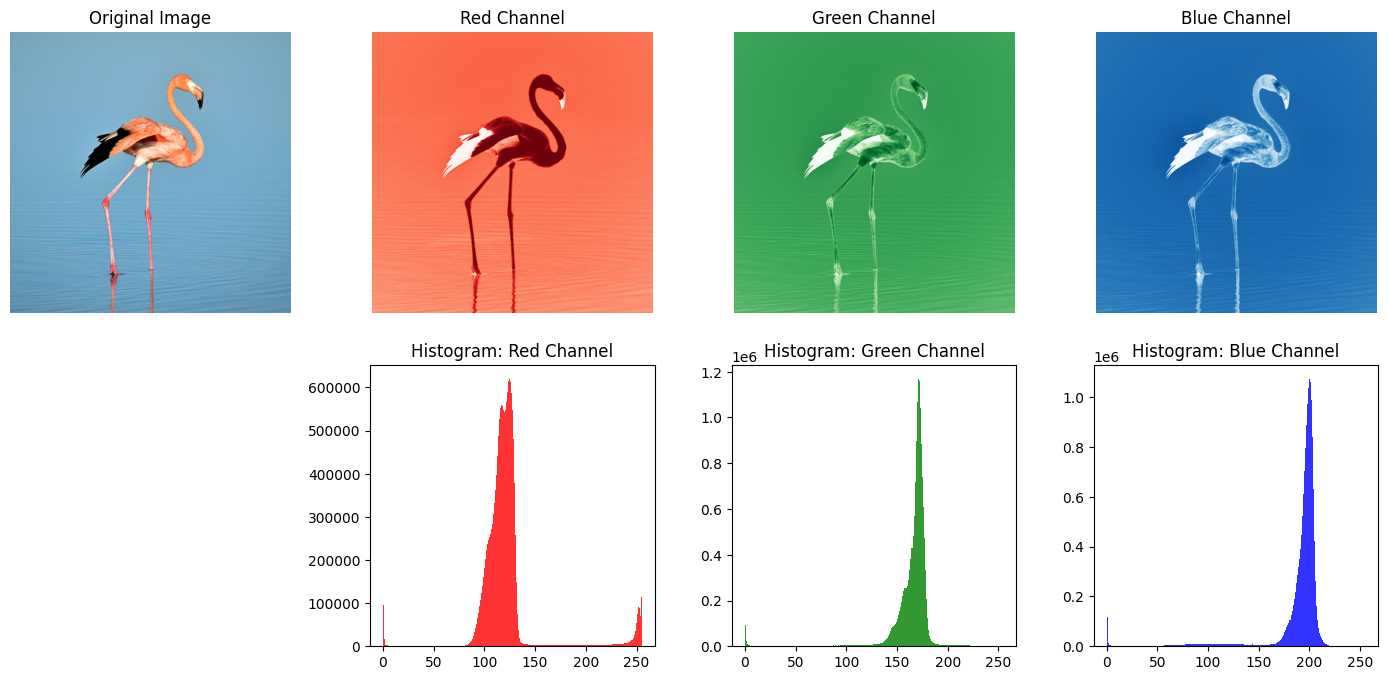

In [51]:
# Original Question:
# 18. Show RGB colour components of an image separately as well as plot their corresponding histograms.

import cv2
import matplotlib.pyplot as plt

# Load the image (replace with your file path)
image = cv2.imread('images/image1.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract RGB channels
R = image_rgb[:, :, 0]
G = image_rgb[:, :, 1]
B = image_rgb[:, :, 2]

# Plot RGB components and their histograms
plt.figure(figsize=(14, 10))

# Original Image
plt.subplot(3, 4, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Red Channel
plt.subplot(3, 4, 2)
plt.imshow(R, cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

plt.subplot(3, 4, 6)
plt.hist(R.ravel(), bins=256, color='red', alpha=0.8)
plt.title("Histogram: Red Channel")

# Green Channel
plt.subplot(3, 4, 3)
plt.imshow(G, cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

plt.subplot(3, 4, 7)
plt.hist(G.ravel(), bins=256, color='green', alpha=0.8)
plt.title("Histogram: Green Channel")

# Blue Channel
plt.subplot(3, 4, 4)
plt.imshow(B, cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.subplot(3, 4, 8)
plt.hist(B.ravel(), bins=256, color='blue', alpha=0.8)
plt.title("Histogram: Blue Channel")

plt.tight_layout()
plt.show()


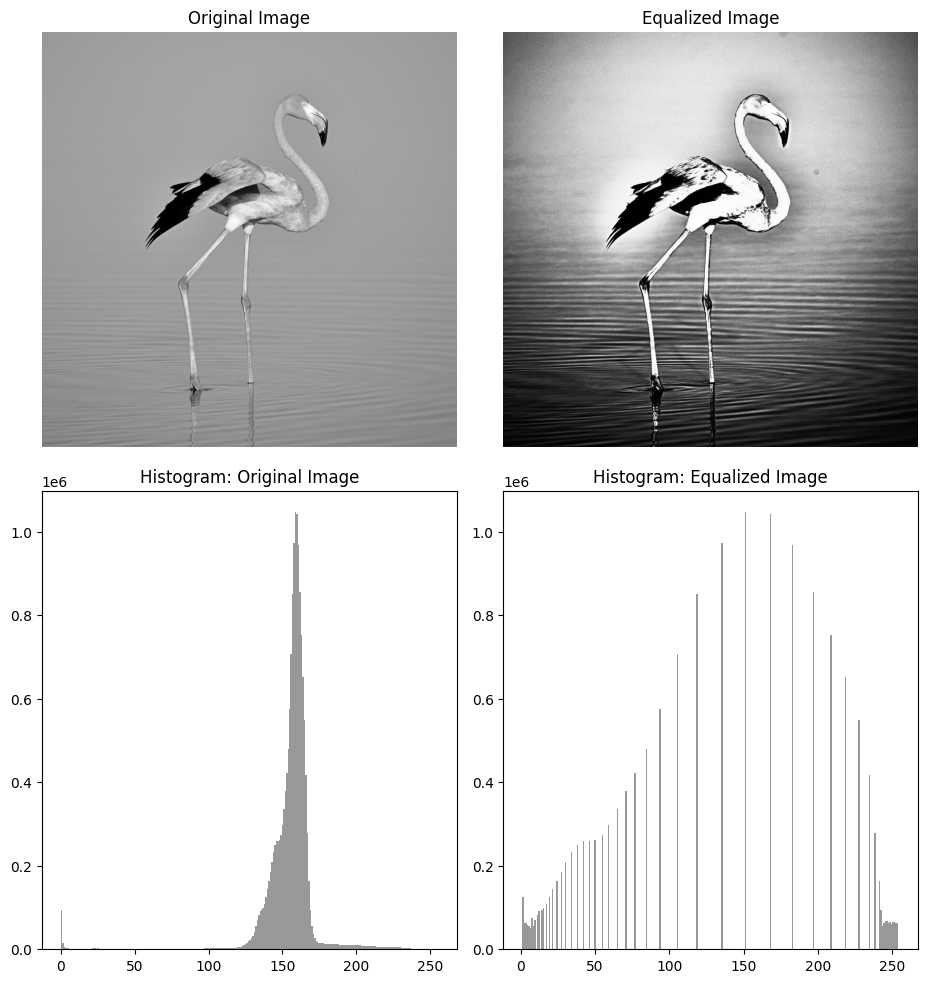

In [52]:
# Original Question:
# 19. Perform Histogram Equalization for the purpose of image enhancement. 
# Display the original image, the enhanced image, and their corresponding histograms respectively. 
# (Refrain from using built-in functions like "equalizeHist" in OpenCV).

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()
cdf_normalized = cdf * (255 / cdf[-1])

# Perform histogram equalization manually
equalized_image = np.interp(image.flatten(), bins[:-1], cdf_normalized).reshape(image.shape).astype('uint8')

# Plot images and histograms
plt.figure(figsize=(14, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Original Image")

# Equalized Image
plt.subplot(2, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(equalized_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Equalized Image")

plt.tight_layout()
plt.show()


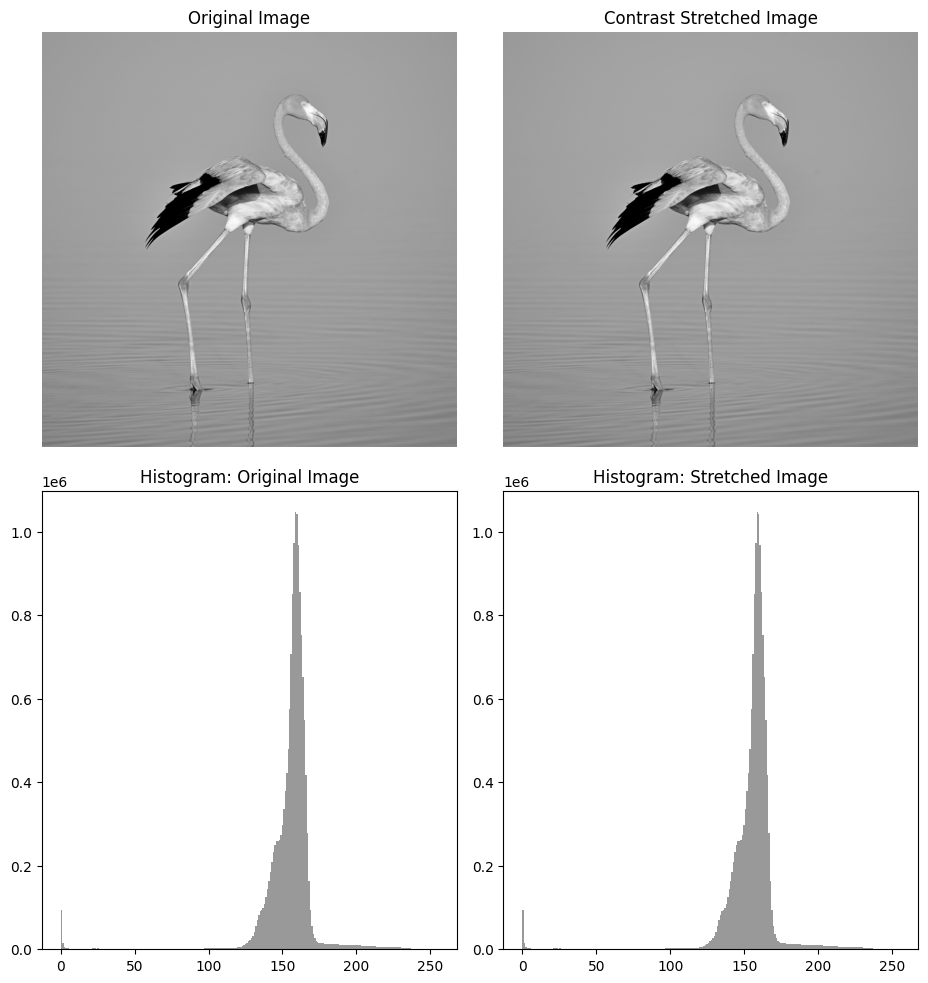

In [53]:
# Original Question:
# 20. Perform Contrast Stretching for the purpose of image enhancement. 
# Display the original image, the enhanced image, and their corresponding histograms respectively.
# (Refrain from using built-in functions like "normalization" in OpenCV).

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('images/image1.jpg', cv2.IMREAD_GRAYSCALE)

# Contrast stretching
min_val, max_val = np.min(image), np.max(image)
stretched_image = ((image - min_val) / (max_val - min_val) * 255).astype('uint8')

# Plot images and histograms
plt.figure(figsize=(14, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.hist(image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Original Image")

# Stretched Image
plt.subplot(2, 3, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title("Contrast Stretched Image")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.hist(stretched_image.ravel(), bins=256, color='gray', alpha=0.8)
plt.title("Histogram: Stretched Image")

plt.tight_layout()
plt.show()
